In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("G:/Education/Machine Learning/ML_CSV_FILES/mexico_house_rents.csv")
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [3]:
city = df['city'].unique()
city

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

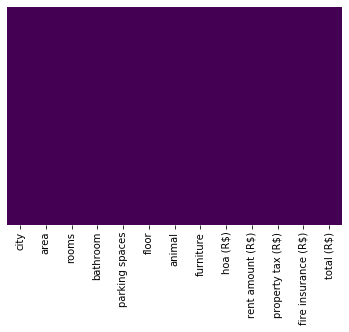

In [4]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

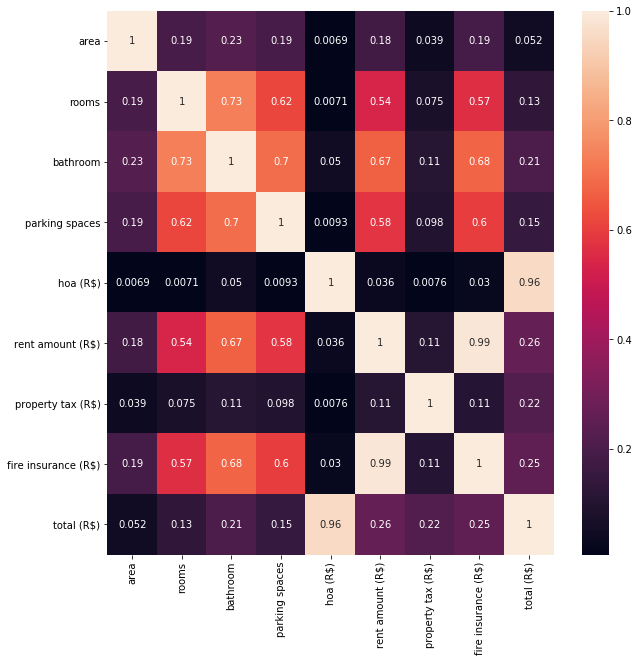

In [5]:
plt.figure(figsize =(10,10))
sns.heatmap(df.corr(),annot= True,cmap = 'rocket')

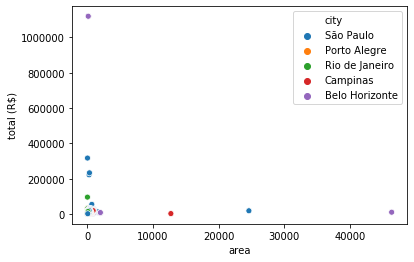

In [6]:
sns.scatterplot(x = 'area', y = 'total (R$)', hue = 'city',data = df)

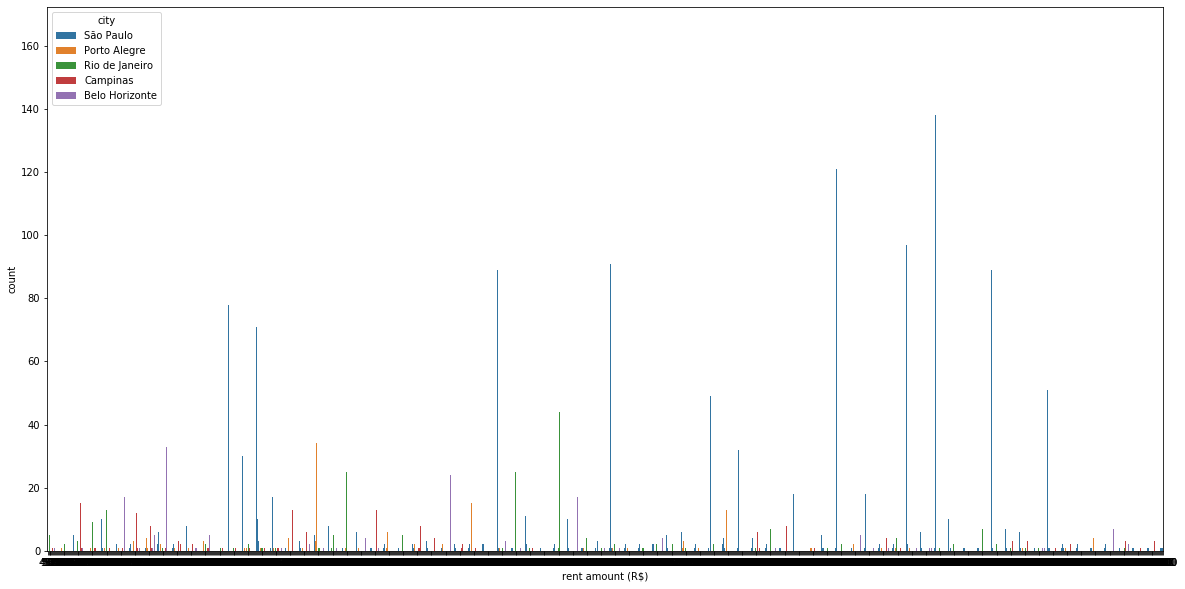

In [7]:
plt.figure(figsize=(20,10))
sns.countplot('rent amount (R$)',hue = 'city', data = df)

Text(0.5, 1.0, 'Houses available for rent in mexico city')

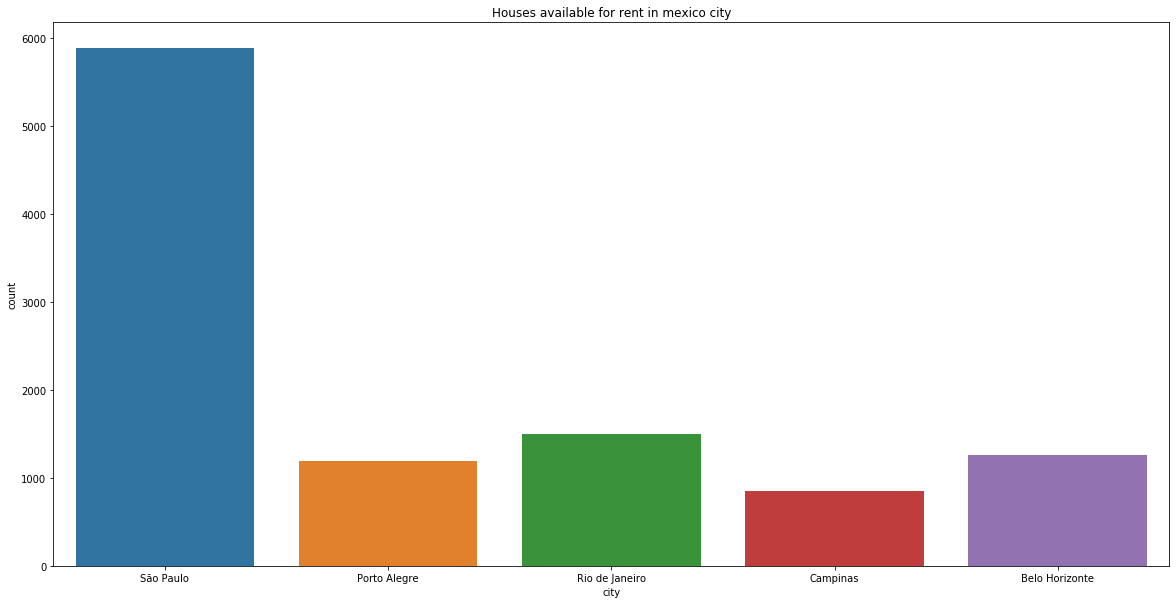

In [8]:
plt.figure(figsize=(20,10))
sns.countplot('city', data = df)
plt.title("Houses available for rent in mexico city")

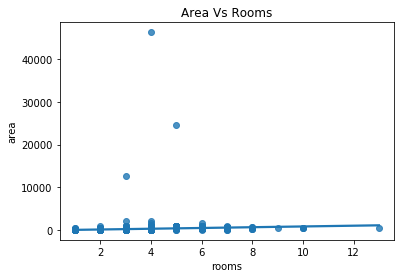

In [9]:
fig = sns.regplot(x = "rooms", y = "area", data = df)
plt.title("Area Vs Rooms")
plt.show()

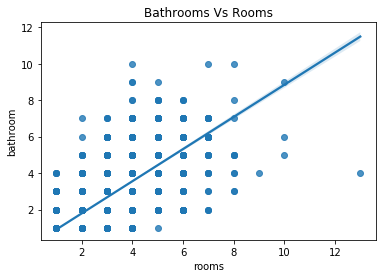

In [10]:
fig = sns.regplot(x = "rooms", y = "bathroom", data = df)
plt.title("Bathrooms Vs Rooms")
plt.show()

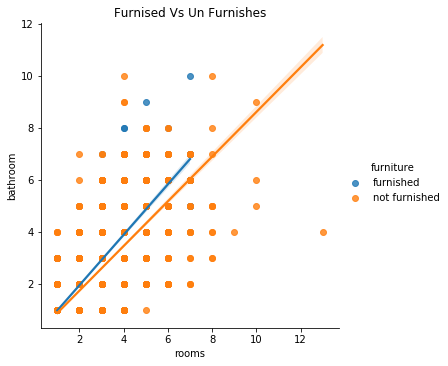

In [11]:
fig = sns.lmplot(x="rooms", y="bathroom", data=df, hue="furniture")
plt.title("Furnised Vs Un Furnishes")
plt.show()

In [12]:
df.area.max()

46335

In [13]:
df.floor.max()

'9'

In [14]:
# sns.countplot("city",hue = "total (R$)", data=df)

In [15]:
drop = df.drop('city', axis = 1, inplace = True)

In [16]:
df.head(10)

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955
6,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,35,1,1,0,2,acept,furnished,590,2300,35,30,2955


In [17]:
df['animal'] = pd.get_dummies(df['animal'])

In [18]:
df['furniture'] = pd.get_dummies(df['furniture'])

In [19]:
df.drop('floor', axis = 1, inplace = True)

In [20]:
df.dtypes

area                   int64
rooms                  int64
bathroom               int64
parking spaces         int64
animal                 uint8
furniture              uint8
hoa (R$)               int64
rent amount (R$)       int64
property tax (R$)      int64
fire insurance (R$)    int64
total (R$)             int64
dtype: object

In [21]:
x = df.drop(['total (R$)'], axis = 1)
y = df['total (R$)']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, r2_score
from sklearn import metrics

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 1/3, random_state = 0)

# LINEAR REGRESSION

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
prediction =lr.predict(x_test)

In [27]:
score = round((lr.score(x_test, y_test)*100),2)
print("\nModel Score:",score,"%")


Model Score: 100.0 %


In [28]:
r2_score(y_test,prediction)

0.9999987113547202

# RANDOM FOREST REGRESSION

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0) # n_estimators ARE CALLED AS TREES IN THE FOREST REGRESSOR #
regressor.fit(x,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [31]:
prediction = regressor.predict(x_test)

In [32]:
score = round((lr.score(x_test, y_test)*100),2)
print("\nModel Score:",score,"%")


Model Score: 100.0 %


In [33]:
r2_score(y_test,prediction)

0.9211052563600559

# SUPPORT VECTOR REGRESSION

In [34]:
from sklearn.svm import SVR

In [35]:
regressor = SVR(kernel = "rbf")
regressor.fit(x,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [36]:
prediction = regressor.predict(x_test)

In [37]:
score = round((lr.score(x_test, y_test)*100),2)
print("\nModel Score:",score,"%")


Model Score: 100.0 %


In [38]:
r2_score(y_test,prediction)

0.03135550760791117

# DECISION TREE REGRESSION

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
regressor = DecisionTreeRegressor()
regressor.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [41]:
prediction = regressor.predict(x_test)

In [42]:
score = round((lr.score(x_test, y_test)*100),2)
print("\nModel Score:",score,"%")


Model Score: 100.0 %


In [43]:
r2_score(y_test,prediction)

1.0

# KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
lr = KNeighborsClassifier()
lr.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [46]:
prediction = lr.predict(x_test)

In [47]:
score = round((lr.score(x_test, y_test)*100),2)
print("\nModel Score:",score,"%")


Model Score: 3.87 %


In [48]:
r2_score(y_test,prediction)

0.462911900917336

* LINEAR REGRESSION GOT THE HIGHEST SCORE AND THE MAXIMUM R^2 VALUE